# Crawling/Spidering Verarbeitung und Visualisierung

In [19]:
%load_ext autoreload
%autoreload
import pandas as pd
import json
from itertools import chain
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)

import plotly.express as px
from helper import convert_curl_output

from vis import draw
from py2neo import Graph
from py2neo import Node
from py2neo import Relationship
from helper import convert_curl_output
from IPython.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Vorverarbeitung der Crawling-Daten

In [20]:
df = convert_curl_output("data/curl_html_resp")
df.head()

,http_response,source,url,redir_url,time_redir,num_redir,size_download,content_type,filename
0,400,gospider,http://www.hsu-hh.de/wp-admin/admin-ajax.php,https://www.hsu-hh.de/wp-admin/admin-ajax.php,0.038817,1,1,text/html; charset=UTF-8,Zi7G5gWqlcmnJKXW
1,403,gospider,http://www.hsu-hh.de/wp-admin/,https://www.hsu-hh.de/wp-login.php?redirect_to=https%3A%2F%2Fwww.hsu-hh.de%2Fwp-admin%2F&reauth=1,0.281866,2,199,text/html; charset=iso-8859-1,vVJY1Gvt7eJa0ZVh
2,400,gospider,http://www.hsu-hh.de/wp-admin/admin-ajax.php,https://www.hsu-hh.de/wp-admin/admin-ajax.php,0.037403,1,1,text/html; charset=UTF-8,OT3yMfsgrn6kGbQn
3,403,gospider,http://www.hsu-hh.de/wp-admin/,https://www.hsu-hh.de/wp-login.php?redirect_to=https%3A%2F%2Fwww.hsu-hh.de%2Fwp-admin%2F&reauth=1,0.376770,2,199,text/html; charset=iso-8859-1,Ny1X3rFmgVyuK3Th
4,200,gau,http://hsu-hh.de:80/ant/index.php?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http://www.hsu-hh.de/ant/index.php?brick_id%3DO4s0mY947QkZRCL7,https://www.hsu-hh.de/ant/?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http%3A%2F%2Fwww.hsu-hh.de%2Fant%2Findex.php%3Fbrick_id%3DO4s0mY947QkZRCL7,0.357389,3,33106,text/html; charset=UTF-8,3Pn2jPlP9rxt2du8


## Gruppiertes Balkendiagramm zur Darstellung der Menge der HTTP-Responses über unterschiedliche Tools

In [21]:
url_count = df.groupby("source")["http_response"].value_counts() #.unstack(fill_value=0).T
url_count = url_count.to_frame()
url_count = url_count.rename(columns={"http_response":"number_responses"}).reset_index()
url_count

,source,http_response,number_responses
0,gau,200,24175
1,gau,404,16077
2,gau,410,2864
3,gau,000,175
4,gau,500,173
5,gau,301,163
6,gau,403,80
7,gau,400,2
8,gospider,200,34581
9,gospider,000,106


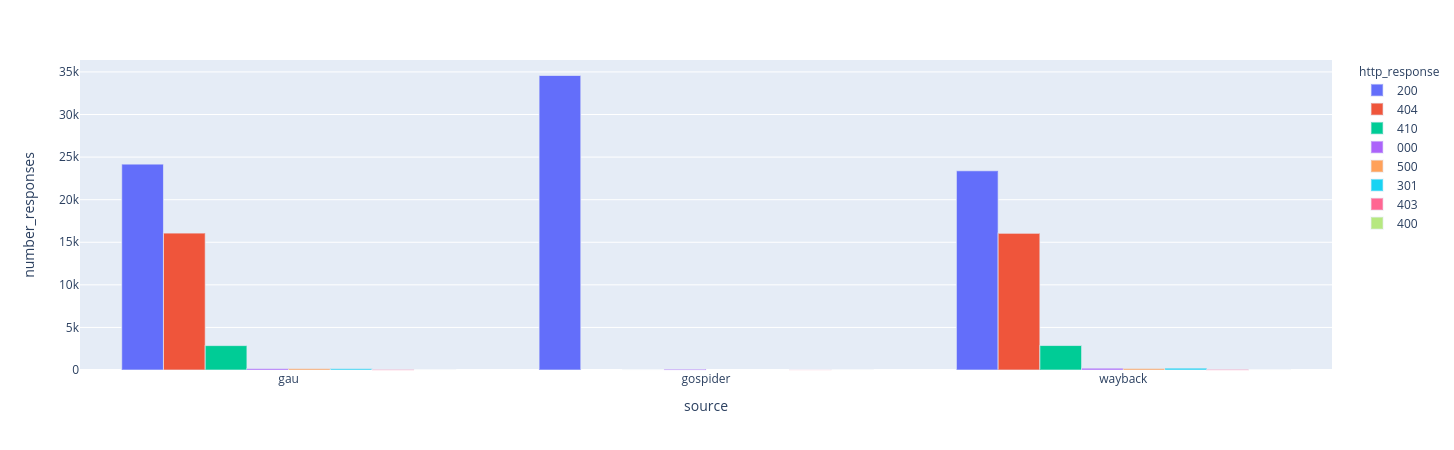

In [22]:
px.bar(url_count, x="source", y="number_responses", color="http_response", barmode="group")

### Filterung anhand Pandas Filter-Interface

In [23]:
df[(df["http_response"] == "200") & (df["source"] == "wayback") & (df["content_type"] == "text/html; charset=UTF-8")]

,http_response,source,url,redir_url,time_redir,num_redir,size_download,content_type,filename
37808,200,wayback,http://hsu-hh.de:80/ant/index.php?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http://www.hsu-hh.de/ant/index.php?brick_id%3DKd8FIeJbIjdSqN5I,https://www.hsu-hh.de/ant/?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http%3A%2F%2Fwww.hsu-hh.de%2Fant%2Findex.php%3Fbrick_id%3DKd8FIeJbIjdSqN5I,0.382729,3,33106,text/html; charset=UTF-8,qCg3H1wuuACJzGBD
37809,200,wayback,http://hsu-hh.de:80/campusinfo/index.php?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http://www.hsu-hh.de/campusinfo/index.php?brick_id%3DyqeeShFtHc3yUvM1,https://www.hsu-hh.de/campusinfo/?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http%3A%2F%2Fwww.hsu-hh.de%2Fcampusinfo%2Findex.php%3Fbrick_id%3DyqeeShFtHc3yUvM1,0.420898,3,33642,text/html; charset=UTF-8,fPNIbIE0YXR6GRdN
37810,200,wayback,http://hsu-hh.de:80/ant/index.php?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http://www.hsu-hh.de/ant/index.php?brick_id%3DkWR9lBCiyWad6ar5,https://www.hsu-hh.de/ant/?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http%3A%2F%2Fwww.hsu-hh.de%2Fant%2Findex.php%3Fbrick_id%3DkWR9lBCiyWad6ar5,0.354006,3,33106,text/html; charset=UTF-8,iHiMMcaFHmx1RcNr
37811,200,wayback,http://hsu-hh.de:80/ant/index.php?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http://www.hsu-hh.de/ant/index.php?brick_id%3DO4s0mY947QkZRCL7,https://www.hsu-hh.de/ant/?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http%3A%2F%2Fwww.hsu-hh.de%2Fant%2Findex.php%3Fbrick_id%3DO4s0mY947QkZRCL7,0.366622,3,33106,text/html; charset=UTF-8,15Qz8fN2W2vR7hqm
37812,200,wayback,http://hsu-hh.de:80/diffpsych/index.php?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http://www.hsu-hh.de/diffpsych/index.php?brick_id%3DGxPeQyrn5uiRN7L2,https://www.hsu-hh.de/diffpsych/?brick_id=eNdFeyoutMvDDe7P&action=login&urltarget=http%3A%2F%2Fwww.hsu-hh.de%2Fdiffpsych%2Findex.php%3Fbrick_id%3DGxPeQyrn5uiRN7L2,0.366421,3,39706,text/html; charset=UTF-8,XzNBHbAxwxf6y7ne
...,...,...,...,...,...,...,...,...,...
121417,200,wayback,https://www.hsu-hh.de/zw/en/central-workshop-electronic,https://www.hsu-hh.de/zw/en/central-workshop-electronic,0.000000,0,32586,text/html; charset=UTF-8,Wj9GNKsmLavmsUPs
121419,200,wayback,https://www.hsu-hh.de/zw/en/central-workshop-construction-cw-c,https://www.hsu-hh.de/zw/en/central-workshop-construction-cw-c,0.000000,0,35153,text/html; charset=UTF-8,eCVAGq3tXhpdM8rW
121420,200,wayback,https://www.hsu-hh.de/zw/en/central-workshop-mechanic-zw-m,https://www.hsu-hh.de/zw/en/central-workshop-mechanic-zw-m,0.000000,0,35328,text/html; charset=UTF-8,AmNlQt8K1EPN2jPb
121422,200,wayback,https://www.hsu-hh.de/zw/en/imprint,https://www.hsu-hh.de/zw/en/imprint,0.000000,0,33529,text/html; charset=UTF-8,6T3A9hdh3k97ghcX


## Visualisierung der Crawling-Daten mit Graph 

### Vorbereitung der Daten -> Generierung Sitemap
  * Code-snippets from https://github.com/Ayima/sitemap-visualization-tool/

In [24]:
urls = df["url"]
http_resp = df["http_response"]
urls = df[df["source"] == "wayback"]["url"]
http_resp = df[df["source"] == "wayback"]["http_response"]

In [25]:
layers = 7

# Store results in a dataframe
sitemap_layers = pd.DataFrame()

# Get base levels
bases = pd.Series([url.split('//')[-1].split('/')[0] for url in urls])
sitemap_layers[0] = bases

for layer in range(1, layers+1):

    page_layer = []
    for url, base in zip(urls, bases):
        try:
            page_layer.append(url.split(base)[-1].split('/')[layer])
        except:
            # There is nothing that deep!
            page_layer.append('')

    sitemap_layers[layer] = page_layer

print(sitemap_layers.shape)
sitemap_layers.head()

(43021, 8)


,0,1,2,3,4,5,6,7
0,www.hsu-hh.de,WWEB,index.php?brick_id%3DNU9hiSfpRTD0opGU,,,,,
1,www.hsu-hh.de,WWEB,index.php?brick_id%3DTxXUoUp735WQiUBu,,,,,
2,www.hsu-hh.de,WWEB,index.php?brick_id%3DitUl1Y0EI6FmH8sf,,,,,
3,www.hsu-hh.de,adc,index.php?brick_id%3DL1mYD4ZdCU98JS1b,,,,,
4,www.hsu-hh.de,ant,index.php?brick_id%3DKd8FIeJbIjdSqN5I,,,,,


In [26]:
sitemap_layers["http_response"] = http_resp

In [27]:
sitemap_layers = sitemap_layers.groupby(list(range(0, layers+1)))["http_response"].value_counts()\
    .to_frame()\
    .rename(columns={"http_response":"number_response"})\
    .reset_index()\
    .sort_values("number_response", ascending=False)\
    .reset_index()\
    .drop(columns=["index"])

# Convert column names to string types and export
sitemap_layers.columns = [str(col) for col in sitemap_layers.columns]

In [28]:
sitemap_layers_cut = sitemap_layers[4:204].reset_index().drop(columns=["index"])

In [29]:
sitemap_layers_cut.head()

,0,1,2,3,4,5,6,7,http_response,number_response
0,www.hsu-hh.de,weiterbildung,wp-content,uploads,sites,780,2018,01,200,10
1,www.hsu-hh.de,,,,,,,,404,7
2,www.hsu-hh.de,auslandsstud,wp-content,uploads,sites,767,2018,01,404,6
3,www.hsu-hh.de,weiterbildung,wp-content,uploads,sites,780,2019,08,200,5
4,www.hsu-hh.de,weiterbildung,wp-content,uploads,sites,780,2017,11,200,5


### Erzeugung des Graphs

In [30]:
graph = Graph("http://172.17.0.1:7474/", password="start123")
graph.delete_all()

In [31]:
node_dict = {}

for i in range(0,layers+1):
    node_dict[str(i)] = {}
    for index, value in sitemap_layers_cut[str(i)].iteritems():
        if (value not in node_dict[str(i)].keys()) and value:
            if (not sitemap_layers_cut.iloc[index, i+1]) or (i==layers):
                node_response = sitemap_layers_cut.iloc[index,layers+1]
                node_size = sitemap_layers_cut.iloc[index,layers+2]
                node = Node(node_response, 
                            name=value, 
                            description=f'HTTP_TYPE:{node_response} NUMBER:{node_size}<br>{value}', 
                            label=str(node_size))
            else:
                node = Node("URL", name=value, description=value)
            graph.create(node)
            node_dict[str(i)][value] = node
            if i>0:
                prev_val = sitemap_layers_cut.iloc[index, i-1]
                rel = Relationship(node_dict[str(i)][value], 
                             "belongs_to",
                             node_dict[str(i-1)][str(prev_val)])
                graph.create(rel)

In [32]:
output = draw(graph, physics=False, hierarchical=True, physics_model="hierarchicalRepulsion")
output[0][0]

In [33]:
display(HTML(f'<a href={output[0][1]}> Click to download graph</a>'))